In [2]:
#import necessary libraries and Modules
import ImageManipFuncs as IMF
import PlottingFuncs as PF
import ImageAnalysis as IA
import myGUI 

import importlib
import cv2
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import os
import ipywidgets as widgets
from IPython.display import display
import math
from PIL import Image, ImageDraw, ImageTk, ImageOps
import tkinter as tk
from tkinter import ttk




In [3]:
importlib.reload(IMF)
importlib.reload(PF)
importlib.reload(IA)

<module 'ImageAnalysis' from 'c:\\Users\\HP\\Documents\\JHU_Academics\\Research\\PHANGS\\PHANGSDustFill\\ImageAnalysis.py'>

Thresholded image saved as C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\ThinSkeleton1Invert.png
(1038, 1042)


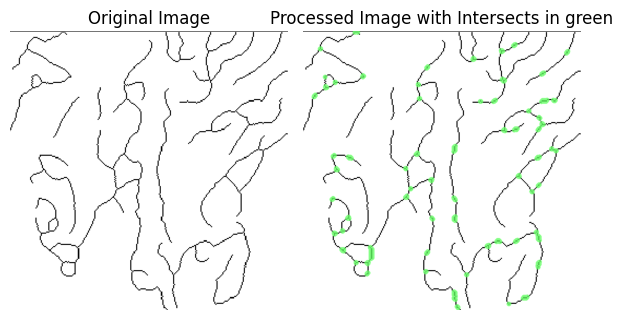

Processed C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\ThinSkeleton1Invert.png successfully. Saved as C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\ThinSkeleton1NoIntersects.png
(1038, 1042)


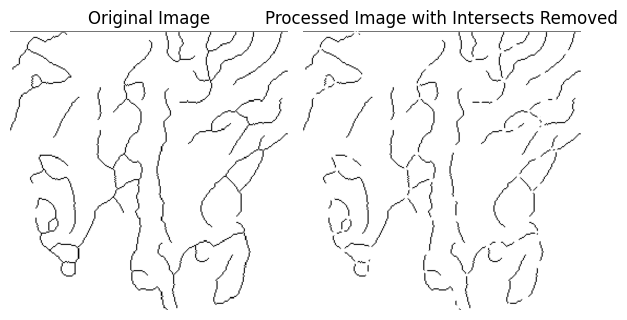

Processed C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\ThinSkeleton1Invert.png successfully. Saved as C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\ThinSkeleton1NoIntersects.png


In [4]:
input_image = r'C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\ThinSkeleton1.png'
invert_input = r'C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\ThinSkeleton1Invert.png'
intersects_removed = r'C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\ThinSkeleton1NoIntersects.png'
 
IMF.invert_image(input_image, invert_input)
IA.identify_intersects(invert_input, intersects_removed,dot_size=8,box_size=121, perc = .4, RGBA_color = (100, 255, 100, 200), title = 'Processed Image with Intersects in green')
IA.identify_intersects(invert_input, intersects_removed,dot_size=4,box_size=121, perc = .4, RGBA_color = (255, 255, 255, 255), title = 'Processed Image with Intersects Removed')

Thresholded image saved as C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\InvertIntersects.png


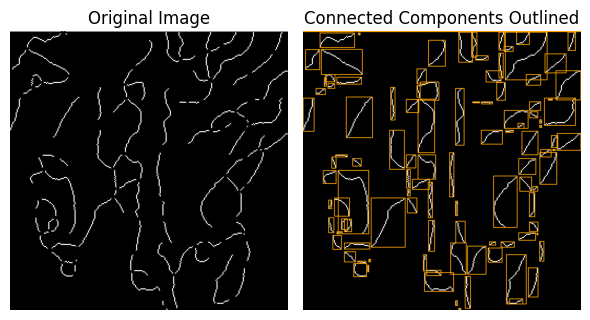

In [5]:
invert_intersects_removed = r'C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\InvertIntersects.png'
IMF.invert_image(intersects_removed ,invert_intersects_removed)
labels, stats, num_labels = IA.identify_connected_components(invert_intersects_removed)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


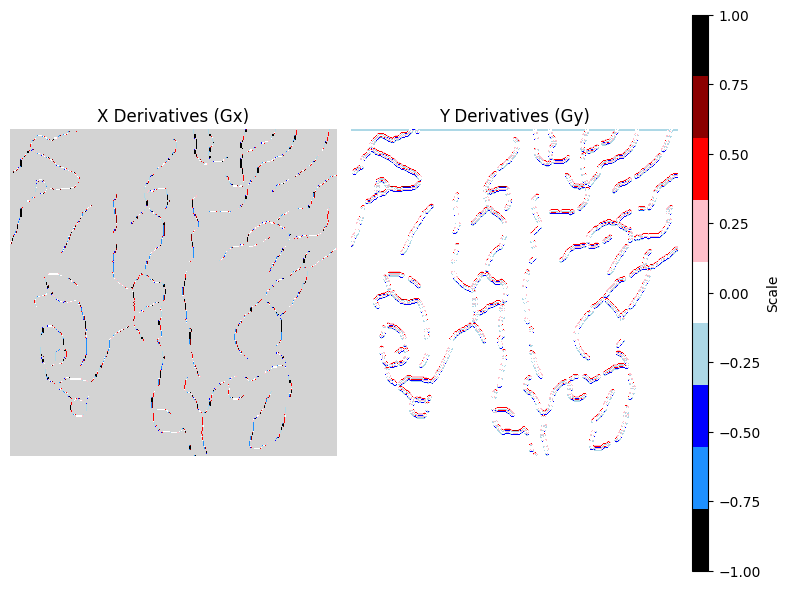

In [27]:
# read the image
importlib.reload(IA)
importlib.reload(PF)
# img = cv2.imread(intersects_removed)

# # convert to gray
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# # blur
# blur = cv2.GaussianBlur(gray, (0,0), 1.3, 1.3)
# # apply sobel derivatives
# sobelx = cv2.Sobel(blur,cv2.CV_64F,1,0,ksize=3)
# sobely = cv2.Sobel(blur,cv2.CV_64F,0,1,ksize=3)
# PF.plot_sobel_derivatives(sobelx, sobely)
mask_path = intersects_removed

sobel_x, sobel_y = IA.apply_sobel_filter_to_components(invert_intersects_removed, labels, stats, num_labels)
PF.plot_sobel_derivatives(mask_path,sobel_x, sobel_y)



c:\Users\HP\Documents\JHU_Academics\Research\PHANGS\PHANGSDustFill\PlottingFuncs.py:107: RuntimeWarning: divide by zero encountered in divide
  angle_map = -1*np.degrees(np.arctan(Gy/Gx))
c:\Users\HP\Documents\JHU_Academics\Research\PHANGS\PHANGSDustFill\PlottingFuncs.py:107: RuntimeWarning: invalid value encountered in divide
  angle_map = -1*np.degrees(np.arctan(Gy/Gx))
c:\Users\HP\Documents\JHU_Academics\Research\PHANGS\PHANGSDustFill\PlottingFuncs.py:93: RuntimeWarning: invalid value encountered in scalar divide
  return np.degrees(np.arctan(sin_sum/cos_sum))


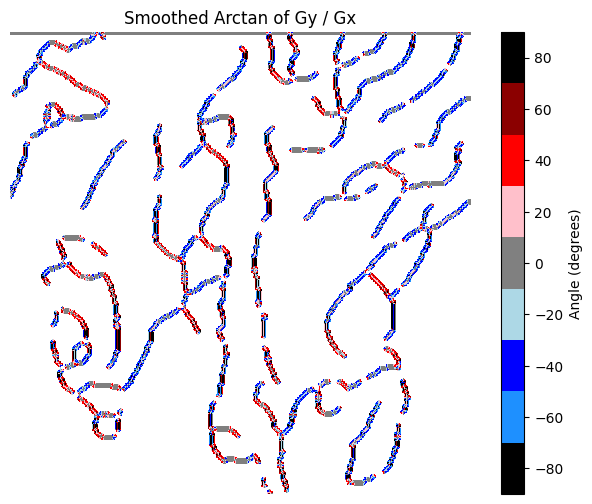

Smoothed angle map saved as C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\smoothed_angles.png


In [7]:
importlib.reload(PF)
smoothed_angles = r'C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\smoothed_angles.png'

smoothed_angle_map, copy_angled_map = PF.plot_arctan_with_smoothing(sobel_y, sobel_x,invert_intersects_removed, 3, smoothed_angles)

In [8]:
importlib.reload(myGUI)
original_image_path = r'C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\smoothed_angles.png'  
hexagon_size = 60
data_array = smoothed_angle_map  # Ensure this variable is passed correctly

original_image = Image.open(original_image_path).convert("RGBA")

hexagons, im_display = myGUI.update_image(hexagon_size, original_image)

param = {
    'hexagon_size': hexagon_size,
    'original_image': original_image,
    'hexagons': hexagons,
    'im_display': im_display,
    'im_display_base': im_display.copy(),
    'data_array': data_array,
    'hex_data': [],
    'hex_center': None  # Store the center of the hexagon
}

# Create window and set mouse callback
cv2.namedWindow('image')
cv2.setMouseCallback('image', myGUI.click_event, param)

# Create Tkinter window for buttons
root = tk.Tk()
root.title("Hexagon Size Adjuster")

increase_button = ttk.Button(root, text="+", command=lambda: myGUI.increase_hexagon_size(param))
increase_button.pack(side=tk.LEFT)

decrease_button = ttk.Button(root, text="-", command=lambda: myGUI.decrease_hexagon_size(param))
decrease_button.pack(side=tk.LEFT)

analyze_button = ttk.Button(root, text="Analyze Hexagon", command=lambda: myGUI.analyze_hexagon(param['hex_data'], param['hex_center']))
analyze_button.pack(side=tk.LEFT)

def on_closing():
    cv2.destroyAllWindows()
    root.destroy()

root.protocol("WM_DELETE_WINDOW", on_closing)
root.mainloop()
